# Simultaneous perturbation stochastic approximation

SPSA is a descent method capable of finding global minima, sharing this property with other methods such as simulated annealing. Its main feature is the gradient approximation that requires only two measurements of the objective function, regardless of the dimension of the optimization problem. Recall that we want to find the optimal control $u^*$ with loss function $J(u)$ :
$$
u^*=\arg \min _{u \in U} J(u)
$$

Both Finite Differences Stochastic Approximation (FDSA) and SPSA use the same iterative process:
$$
u_{n+1}=u_n-a_n \hat{g}_n\left(u_n\right) \text {, }
$$
where $u_n=\left(\left(u_n\right)_1,\left(u_n\right)_2, \ldots,\left(u_n\right)_p\right)^T$ represents the $n^{t h}$ iterate, $\hat{g}_n\left(u_n\right)$ is the estimate of the gradient of the objective function $g(u)=\frac{\partial}{\partial u} J(u)$ evaluated at $u_n$, and $\left\{a_n\right\}$ is a positive number sequence converging to 0 . If $u_n$ is a $p$ dimensional vector, the $i^{\text {th }}$ component of the symmetric finite difference gradient estimator is:
$$
\text { FD: }\left(\hat{g_n}\left(u_n\right)\right)_i=\frac{J\left(u_n+c_n e_i\right)-J\left(u_n-c_n e_i\right)}{2 c_n},
$$
$1 \leq i \leq p$, where $e_i$ is the unit vector with a 1 in the $i^{\text {th }}$ place, and $c_n$ is a small positive number that decreases with $n$. With this method, $2 p$ evaluations of $J$ for each $g_n$ are needed. When $p$ is large, this estimator loses efficiency.

Let now $\Delta_n$ be a random perturbation vector. The $i^{\text {th }}$ component of the stochastic perturbation gradient estimator is:
$$
\text { SP: }\left(\hat{g_n}\left(u_n\right)\right)_i=\frac{J\left(u_n+c_n \Delta_n\right)-J\left(u_n-c_n \Delta_n\right)}{2 c_n\left(\Delta_n\right)_i} \text {. }
$$

Remark that FD perturbs only one direction at a time, while the SP estimator disturbs all directions at the same time (the numerator is identical in all $p$ components). The number of loss function measurements needed in the SPSA method for each $g_n$ is always 2, independent of the dimension $p$. Thus, SPSA uses $p$ times fewer function evaluations than FDSA, which makes it a lot more efficient.

Simple experiments with $p=2$ showed that SPSA converges in the same number of iterations as FDSA. The latter follows approximately the steepest descent direction, behaving like the gradient method. On the other hand, SPSA, with the random search direction, does not follow exactly the gradient path. In average though, it tracks it nearly because the gradient approximation is an almost unbiased estimator of the gradient, as shown in the following lemma.

## Convergence lemma

Denote by
$$
b_n=E\left[\hat{g}_n \mid u_n\right]-\nabla J\left(u_n\right)
$$
the bias in the estimator $\hat{g}_n$. Assume that $\left\{\left(\Delta_n\right)_i\right\}$ are all mutually independent with zero-mean, bounded second moments, and $E\left(\left|\left(\Delta_n\right)_i\right|^{-1}\right)$ uniformly bounded. Then $b_n \rightarrow 0$ w.p. 1.

Proof. https://en.wikipedia.org/wiki/Simultaneous_perturbation_stochastic_approximation


Iteration 1: theta = [0.50337427 0.22430709 0.88794443 0.5638395  0.40357643], loss = 1.5729335595668348
Iteration 2: theta = [ 0.81863291 -0.09095155  0.57268579  0.24858086  0.08831779], loss = 1.07599351183515
Iteration 3: theta = [ 0.81863291 -0.09095155  0.57268579  0.24858086  0.08831779], loss = 1.07599351183515
Iteration 4: theta = [ 0.62593921 -0.28364524  0.37999209  0.44127456  0.28101149], loss = 0.8903392043442312
Iteration 5: theta = [ 0.48902162 -0.42056283  0.51690968  0.30435698  0.14409391], loss = 0.7966070787530618
Iteration 6: theta = [ 0.23577541 -0.16731662  0.26366347  0.55760319 -0.1091523 ], loss = 0.47593886048585127
Iteration 7: theta = [ 0.03599986 -0.36709217  0.06388792  0.35782764  0.09062325], loss = 0.27638750745271756
Iteration 8: theta = [ 0.17913091 -0.22396111  0.20701897  0.21469658 -0.05250781], loss = 0.17395501203396055
Iteration 9: theta = [ 0.10747855 -0.15230875  0.27867134  0.14304422 -0.12416018], loss = 0.14828470429926194
Iteration 10: t

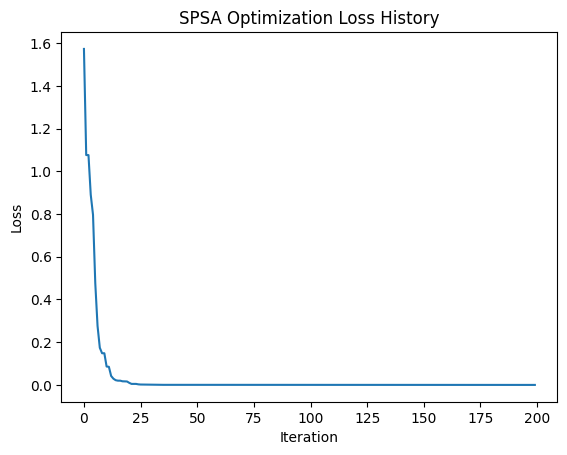

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(theta):
    return np.sum(theta**2)

def spsa_optimization(f, theta_init, alpha, c, num_iterations):
    theta = theta_init
    loss_history = []
    for k in range(num_iterations):
        delta = np.random.choice([-1, 1], size=theta.shape)
        # For example, delta = [-1, 1, -1, 1, 1]
        loss_plus = f(theta + c * delta)  # real number
        loss_minus = f(theta - c * delta)  # real number
        # numerator = loss_plus - loss_minus is a real number
        # denominator = 2 * c * delta is a vector
        g_hat = (loss_plus - loss_minus) / (2 * c * delta)
        theta = theta - alpha * g_hat
        loss = f(theta)
        loss_history.append(loss)
        print(f"Iteration {k+1}: theta = {theta}, loss = {loss}")
    return theta, loss_history

# Parameter initialization
theta_init = np.random.rand(5)
alpha = 0.1
c = 0.1
num_iterations = 200

# Perform SPSA optimization
theta_opt, loss_history = spsa_optimization(f, theta_init, alpha, c, num_iterations)

# Print the optimized results
print("Optimized parameters:", theta_opt)
print("Optimized function value:", f(theta_opt))

# Plot loss value change
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
# plt.yscale('log')
plt.title('SPSA Optimization Loss History')
plt.show()
